In [1]:
#sparting spark and reading Reddit
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Reddit").getOrCreate()
df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit/Reddit_Comments_2006*.csv.gz", header=True,multiLine=True, escape='"')

In [2]:
#spark.sql.caseSensitive = False
#sqlContext.sql("set spark.sql.caseSensitive=false")

In [3]:
#showing the start of the data and format
df.show(5)
df.printSchema()

+--------------------+------------+--------+----+---------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|                body|score_hidden|archived|name|   author|author_flair_text|downs|created_utc|subreddit_id|link_id|parent_id|score|retrieved_on|controversiality|gilded|   id| subreddit|ups|distinguished|author_flair_css_class|
+--------------------+------------+--------+----+---------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|Guess this kinda ...|        null|    null|null|  dbenhur|             null| null| 1152221185|        t5_6|  t3_87|    t3_87|   35|  1473826345|               0|     0|c9gm2|reddit.com| 35|         null|                  null|
|           [deleted]|        null|    null|null|[deleted]|             null| null| 1152

In [4]:
#Convert spark data to be readable using sql queries
df.createOrReplaceTempView("Reddit")
microsoft_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%microsoft%'")
facebook_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%facebook%'")
amazon_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%amazon%'")
google_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%google%'")
microsoft_results.show()

+-----------+--------------------+
|created_utc|                body|
+-----------+--------------------+
| 1138887377|&gt;How do I read...|
| 1139421448|This reminds me w...|
...|
| 1140228495|To be honest, I t...|
| 1140534535|...even if it is ...|
| 1141310099|better google tha...|
| 1141774735|Just for fun, try...|
| 1142008287|How about we get ...|
| 1141999615|Click on "Back to...|
| 1142011255|microsoft gives o...|
| 1142297475|Considering googl...|
| 1142273051|It was a hurried ...|
| 1142600431|good idea. next-u...|
| 1143488319|"Whaaaa Wahhhaaaa...|
| 1143732622|you know this is ...|
| 1143944594|Reddit has a new ...|
| 1144254444|VPC doesn't run o...|
| 1144254029|There is:

http...|
| 1144375601|I thought the 60%...|
| 1144721252|well...im a progr...|
+-----------+--------------------+
only showing top 20 rows



In [5]:
#collect, convert dates to datetime format for later graphing, and sort data
from datetime import datetime
python_microsoft_results = microsoft_results.collect()
python_microsoft_results_cleaned = [(datetime.fromtimestamp(float(i)),body.encode('ascii',errors='ignore')) for i, body in python_microsoft_results]
python_microsoft_results_cleaned.sort()

#b = bytes('pythön', encoding='utf-8')
#print(str(b, encoding='ascii', errors='ignore'))

In [6]:
#validation steps

#print python_microsoft_results_cleaned
#print python_microsoft_results_cleaned

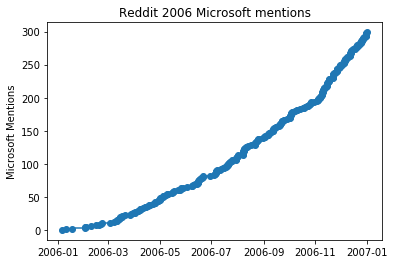

<Figure size 432x288 with 0 Axes>

In [7]:
#sort, number, and then graph the data
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
count = numpy.arange(len(python_microsoft_results_cleaned))
#Date_Data = matplotlib.dates.datestr2num(clean_python_results_utc)
Date_Data = []
Body_Data = []
for date, body in python_microsoft_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Microsoft Mentions')
matplotlib.pyplot.title('Reddit 2006 Microsoft mentions')
plt.show()
plt.savefig('Reddit2006.png')


In [12]:
#import csv
import pandas

# with open('dash.csv', 'w') as csvfile:   #, newline=''
#     #csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     writer = csv.writer(csvfile)
#     writer.writerows("count","Date_Data")

#zipped_Data = zip(Date_Data, body)
#pandas_df = pandas.DataFrame(zipped_Data)
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("dash.csv")

# percentile_list = pd.DataFrame(
#     {'lst1Title': lst1,
#      'lst2Title': lst2,
#      'lst3Title': lst3
#     })

In [5]:
# import csv
# import pandas

# pandas_df = pandas.DataFrame(python_results_timestamp, columns = ['count, timestamp'])
# pandas_df.show()

In [6]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# app.layout = html.Div(children=[
#     html.H1(children='Reddit 2006'),

#     html.Div(children='''
#         Dash: A web application framework for Python.
#     '''),

#     dcc.Graph(
#         id='Reddit 2006 python mentions',
#         figure={
#             'data': [
#                 {'x': Date_Data, 'y': count, 'type': 'scatter', 'name': 'SF'}
#             ],
#             'layout': {
#                 'title': 'Dash Data Visualization'
#             }
#         }
#     )
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True, port = 9990, host ='0.0.0.0')